In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import calendar
from datetime import date
from datetime import datetime

In [3]:
sns.set_theme(style='whitegrid', palette=('Paired'), font='sans-serif', font_scale=1, color_codes=True, rc=None)

In [4]:
wego = pd.read_csv('../data/Headway_Data.csv')
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,15.983333,1.983333,0,0,1,0,0.0,0,2,12.650000
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,17.333333,3.333333,0,0,1,0,0.0,0,11,0.000000
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,NaN,NaN,0,1,0,0,NaN,0,23,22.416666
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,24,5.766666
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,25,0.000000


In [5]:
wego['HDWY_DEV_PCT'] = wego['HDWY_DEV'] / wego['SCHEDULED_HDWY']
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PCT
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,1.983333,0,0,1,0,0.0,0,2,12.650000,0.141667
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,3.333333,0,0,1,0,0.0,0,11,0.000000,0.238095
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,NaN,0,1,0,0,NaN,0,23,22.416666,NaN
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,24,5.766666,NaN
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,NaN,0,0,1,0,NaN,0,25,0.000000,NaN


In [6]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981715 entries, 0 to 1981714
Data columns (total 31 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   CALENDAR_ID                int64  
 1   SERVICE_ABBR               int64  
 2   ADHERENCE_ID               int64  
 3   DATE                       object 
 4   ROUTE_ABBR                 int64  
 5   BLOCK_ABBR                 int64  
 6   OPERATOR                   int64  
 7   TRIP_ID                    int64  
 8   OVERLOAD_ID                int64  
 9   ROUTE_DIRECTION_NAME       object 
 10  TIME_POINT_ABBR            object 
 11  ROUTE_STOP_SEQUENCE        float64
 12  TRIP_EDGE                  int64  
 13  LATITUDE                   float64
 14  LONGITUDE                  float64
 15  SCHEDULED_TIME             object 
 16  ACTUAL_ARRIVAL_TIME        object 
 17  ACTUAL_DEPARTURE_TIME      object 
 18  ADHERENCE                  float64
 19  SCHEDULED_HDWY             float64
 20  AC

In [7]:
wego_tidy = wego.iloc[:, np.r_[0:22, 29, 30]]
wego_tidy.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,DWELL_IN_MINS,HDWY_DEV_PCT
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,12.650000,0.141667
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,0.000000,0.238095
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,-86.781923,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,22.416666,NaN
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,5.766666,NaN
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,-86.781923,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,0.000000,NaN


In [8]:
layover = wego_tidy[wego_tidy.TRIP_EDGE !=2]
layover

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,DWELL_IN_MINS,HDWY_DEV_PCT
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,-86.812719,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,12.650000,0.141667
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,0.000000,0.238095
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,-86.800851,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,5.766666,NaN
5,120211101,1,76447969,2021-11-01,22,2200,1352,298143,0,TO DOWNTOWN,...,-86.845441,04:42:00,04:29:30,04:41:50,0.166666,NaN,NaN,NaN,12.333333,NaN
6,120211101,1,76447970,2021-11-01,22,2200,1352,298143,0,TO DOWNTOWN,...,-86.839981,04:46:00,04:46:58,04:46:58,-0.966666,NaN,NaN,NaN,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981705,120221101,1,91057372,2022-11-01,50,8601,2600,329896,0,FROM DOWNTOWN,...,-86.781923,07:22:00,07:16:44,07:25:54,-3.900000,NaN,NaN,NaN,9.166666,NaN
1981707,120221101,1,91057381,2022-11-01,55,8604,2374,329899,0,TO DOWNTOWN,...,-86.740400,15:12:00,14:39:16,15:11:12,0.800000,0.0,NaN,NaN,31.933333,NaN
1981709,120221101,1,91057723,2022-11-01,50,9302,2355,329980,0,TO DOWNTOWN,...,-86.804683,15:05:00,14:46:41,15:07:36,-2.600000,NaN,NaN,NaN,20.916666,NaN
1981711,120221101,1,91057851,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,...,-86.800851,15:20:00,14:57:12,15:07:06,12.900000,10.0,7.633333,-2.366667,9.900000,-0.236667


In [9]:
layover.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1594480 entries, 0 to 1981713
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   CALENDAR_ID            1594480 non-null  int64  
 1   SERVICE_ABBR           1594480 non-null  int64  
 2   ADHERENCE_ID           1594480 non-null  int64  
 3   DATE                   1594480 non-null  object 
 4   ROUTE_ABBR             1594480 non-null  int64  
 5   BLOCK_ABBR             1594480 non-null  int64  
 6   OPERATOR               1594480 non-null  int64  
 7   TRIP_ID                1594480 non-null  int64  
 8   OVERLOAD_ID            1594480 non-null  int64  
 9   ROUTE_DIRECTION_NAME   1594480 non-null  object 
 10  TIME_POINT_ABBR        1594480 non-null  object 
 11  ROUTE_STOP_SEQUENCE    1594459 non-null  float64
 12  TRIP_EDGE              1594480 non-null  int64  
 13  LATITUDE               1594480 non-null  float64
 14  LONGITUDE         

In [10]:
layover_routes = layover.groupby(['ROUTE_ABBR', 'TRIP_EDGE']).agg({'DWELL_IN_MINS':['mean'], 'HDWY_DEV':['mean']})
layover_routes

DWELL_IN_MINS  HDWY_DEV
                              mean      mean
ROUTE_ABBR TRIP_EDGE                        
3          0              0.216281  0.401955
           1             12.126302  1.783789
7          0              0.210850  0.423648
           1             12.101802  0.458352
22         0              0.101957  0.835121
           1              9.961609  0.686182
23         0              0.865238  0.320139
           1             11.496666  0.281098
50         0              0.375450  0.343754
           1             14.135486  0.253160
52         0              0.942129  0.383679
           1             13.534154  0.564645
55         0              0.382975  0.129438
           1             12.877227  0.215000
56         0              0.903020  0.263420
           1             14.646576  0.154020

In [11]:
layover_routes.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 16 entries, (3, 0) to (56, 1)
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (DWELL_IN_MINS, mean)  16 non-null     float64
 1   (HDWY_DEV, mean)       16 non-null     float64
dtypes: float64(2)
memory usage: 485.0 bytes


<AxesSubplot:xlabel='DWELL_IN_MINS', ylabel='HDWY_DEV'>

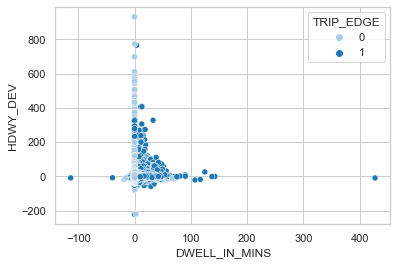

In [12]:
sns.scatterplot(data=layover, x='DWELL_IN_MINS', y='HDWY_DEV', hue='TRIP_EDGE')

In [13]:
layover.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1594480 entries, 0 to 1981713
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   CALENDAR_ID            1594480 non-null  int64  
 1   SERVICE_ABBR           1594480 non-null  int64  
 2   ADHERENCE_ID           1594480 non-null  int64  
 3   DATE                   1594480 non-null  object 
 4   ROUTE_ABBR             1594480 non-null  int64  
 5   BLOCK_ABBR             1594480 non-null  int64  
 6   OPERATOR               1594480 non-null  int64  
 7   TRIP_ID                1594480 non-null  int64  
 8   OVERLOAD_ID            1594480 non-null  int64  
 9   ROUTE_DIRECTION_NAME   1594480 non-null  object 
 10  TIME_POINT_ABBR        1594480 non-null  object 
 11  ROUTE_STOP_SEQUENCE    1594459 non-null  float64
 12  TRIP_EDGE              1594480 non-null  int64  
 13  LATITUDE               1594480 non-null  float64
 14  LONGITUDE         

In [14]:
layover['DATE'] =  pd.to_datetime(layover['DATE'])
layover['WEEKDAY'] = [calendar.day_name[x.weekday()] for x in layover['DATE']]
layover.head()

/var/folders/46/zm0dtt4s22d760_6ml4_t_vr0000gn/T/ipykernel_3775/2891912651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layover['DATE'] =  pd.to_datetime(layover['DATE'])
/var/folders/46/zm0dtt4s22d760_6ml4_t_vr0000gn/T/ipykernel_3775/2891912651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layover['WEEKDAY'] = [calendar.day_name[x.weekday()] for x in layover['DATE']]


,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,DWELL_IN_MINS,HDWY_DEV_PCT,WEEKDAY
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,12.650000,0.141667,Monday
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,0.000000,0.238095,Monday
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,5.766666,NaN,Monday
5,120211101,1,76447969,2021-11-01,22,2200,1352,298143,0,TO DOWNTOWN,...,04:42:00,04:29:30,04:41:50,0.166666,NaN,NaN,NaN,12.333333,NaN,Monday
6,120211101,1,76447970,2021-11-01,22,2200,1352,298143,0,TO DOWNTOWN,...,04:46:00,04:46:58,04:46:58,-0.966666,NaN,NaN,NaN,0.000000,NaN,Monday


In [15]:
layover_new = layover[['ROUTE_ABBR', 'TRIP_EDGE', 'DWELL_IN_MINS', 'HDWY_DEV', 'WEEKDAY']]
layover_new.head()

,ROUTE_ABBR,TRIP_EDGE,DWELL_IN_MINS,HDWY_DEV,WEEKDAY
0,7,1,12.650000,1.983333,Monday
1,7,0,0.000000,3.333333,Monday
3,50,1,5.766666,NaN,Monday
5,22,1,12.333333,NaN,Monday
6,22,0,0.000000,NaN,Monday


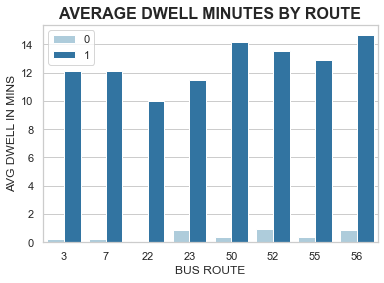

In [49]:
def calculate(layover_new):
    return layover_new.DWELL_IN_MINS.mean()
layover_plot = layover_new.groupby(['ROUTE_ABBR', 'TRIP_EDGE']).apply(calculate)
layover_plot = layover_plot.reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='ROUTE_ABBR', y=0, hue='TRIP_EDGE', palette='Paired', data=layover_plot)
plt.ylabel('AVG DWELL IN MINS')
plt.xlabel('BUS ROUTE')
plt.legend(loc='upper left')
plt.title('AVERAGE DWELL MINUTES BY ROUTE', fontweight = 'bold', size = 16);

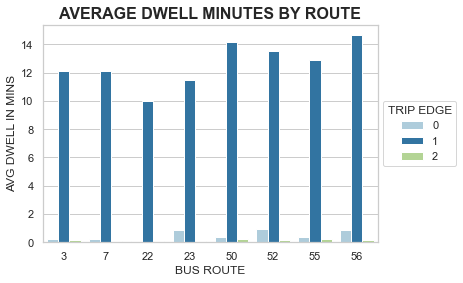

In [64]:
def calculate3(wego_tidy):
    return wego_tidy.DWELL_IN_MINS.mean()
layover_plot3 = wego_tidy.groupby(['ROUTE_ABBR', 'TRIP_EDGE']).apply(calculate3)
layover_plot3 = layover_plot3.reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(x='ROUTE_ABBR', y=0, hue='TRIP_EDGE', palette='Paired', data=layover_plot3)
plt.ylabel('AVG DWELL IN MINS')
plt.xlabel('BUS ROUTE')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'TRIP EDGE')
plt.title('AVERAGE DWELL MINUTES BY ROUTE', fontweight = 'bold', size = 16);b

In [75]:
layover_plot3

,ROUTE_ABBR,TRIP_EDGE,0
0,3,0,0.216281
1,3,1,12.126302
2,3,2,0.147601
3,7,0,0.210850
4,7,1,12.101802
5,7,2,0.100485
6,22,0,0.101957
7,22,1,9.961609
8,22,2,0.060349
9,23,0,0.865238


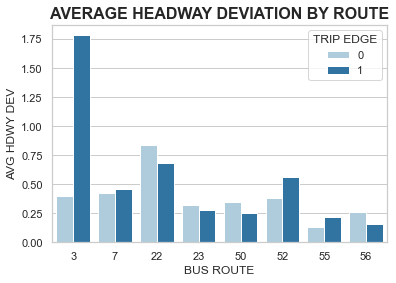

In [65]:
def calculate2(layover_new):
    return layover_new.HDWY_DEV.mean()
layover_plot2 = layover_new.groupby(['ROUTE_ABBR', 'TRIP_EDGE']).apply(calculate2)
layover_plot2 = layover_plot2.reset_index()
sns.barplot(x='ROUTE_ABBR', y=0, hue='TRIP_EDGE', palette='Paired', data=layover_plot2)
plt.ylabel('AVG HDWY DEV')
plt.xlabel('BUS ROUTE')
plt.legend(title = 'TRIP EDGE')
plt.title('AVERAGE HEADWAY DEVIATION BY ROUTE', fontweight = 'bold', size = 16);

In [19]:
layover_route0 = wego_tidy[wego_tidy.TRIP_EDGE ==0]
layover_route0.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,DWELL_IN_MINS,HDWY_DEV_PCT
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,-86.800622,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,0.0,0.238095
6,120211101,1,76447970,2021-11-01,22,2200,1352,298143,0,TO DOWNTOWN,...,-86.839981,04:46:00,04:46:58,04:46:58,-0.966666,NaN,NaN,NaN,0.0,NaN
7,120211101,1,76447971,2021-11-01,22,2200,1352,298143,0,TO DOWNTOWN,...,-86.814445,04:54:00,04:55:00,04:55:00,-1.000000,NaN,NaN,NaN,0.0,NaN
10,120211101,1,76447974,2021-11-01,22,2200,1352,298162,0,FROM DOWNTOWN,...,-86.814220,05:25:00,05:25:52,05:25:52,-0.866666,NaN,NaN,NaN,0.0,NaN
13,120211101,1,76447977,2021-11-01,22,2200,1352,298128,0,TO DOWNTOWN,...,-86.839981,05:46:00,05:48:15,05:48:15,-2.250000,35.0,35.866666,0.866666,0.0,0.024762


In [20]:
layover_route0.groupby(['ROUTE_ABBR', 'ROUTE_STOP_SEQUENCE']).agg({'DWELL_IN_MINS':['mean'], 'HDWY_DEV':['mean']})

DWELL_IN_MINS  HDWY_DEV
                                        mean      mean
ROUTE_ABBR ROUTE_STOP_SEQUENCE                        
3          2.0                      4.246171 -0.152027
           3.0                      0.114369  0.404303
           4.0                      0.399492  0.376553
           5.0                      0.162768  0.354509
           6.0                      2.456349  6.158730
...                                      ...       ...
56         8.0                      0.352888  0.148999
           9.0                      0.965735  0.532384
           10.0                     1.142144  0.148103
           11.0                     1.473200  0.224818
           12.0                     1.883444  0.318349

[71 rows x 2 columns]

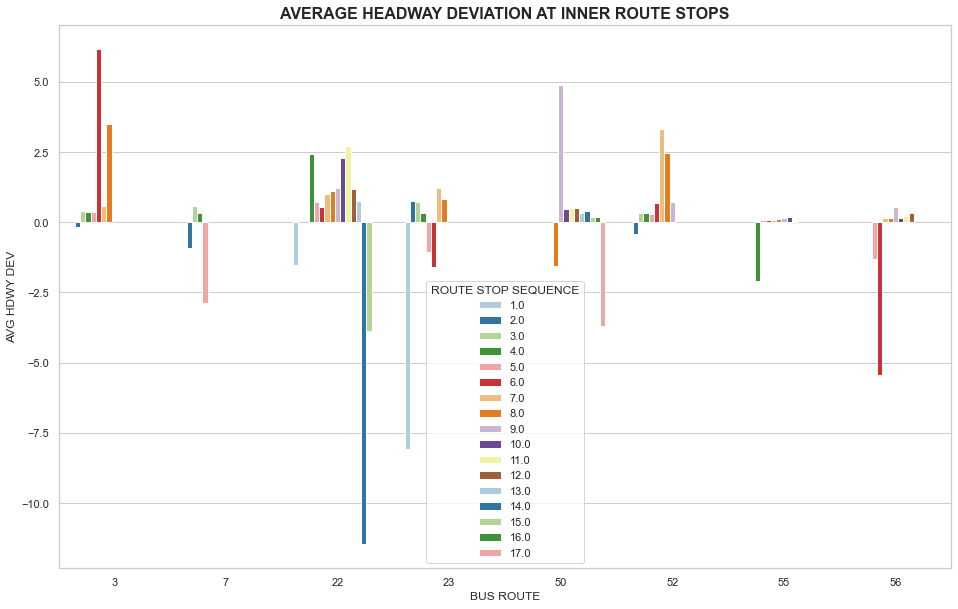

In [79]:
def calculate4(layover_route0):
    return layover_route0.HDWY_DEV.mean()
layover_plot4 = layover_route0.groupby(['ROUTE_ABBR', 'ROUTE_STOP_SEQUENCE']).apply(calculate4)
layover_plot4 = layover_plot4.reset_index()
plt.figure(figsize=(16,10))
sns.barplot(x='ROUTE_ABBR', y=0, hue='ROUTE_STOP_SEQUENCE', palette='Paired', data=layover_plot4)
plt.ylabel('AVG HDWY DEV')
plt.xlabel('BUS ROUTE')
plt.legend(title = 'ROUTE STOP SEQUENCE')
plt.title('AVERAGE HEADWAY DEVIATION AT INNER ROUTE STOPS', fontweight = 'bold', size = 16);

In [22]:
df_dwell = wego_tidy
DWELL_GROUPS = []

for x in df_dwell['DWELL_IN_MINS']:
    if x < 0:
        DWELL_GROUPS.append('Less Than 0')
    elif x >= 0 and x <= 2:
        DWELL_GROUPS.append('0 to 2 MIN')
    elif x > 2 and x <= 4:
        DWELL_GROUPS.append('2 to 4 MIN')
    elif x > 4 and x <= 6:
        DWELL_GROUPS.append('4 to 6 MIN')
    elif x > 6 and x <= 8:
        DWELL_GROUPS.append('6 to 8 MIN')
    elif x > 8 and x <= 10:
        DWELL_GROUPS.append('8 to 10 MIN')
    elif x > 10 and x <= 12:
        DWELL_GROUPS.append('10 to 12 MIN')
    elif x > 12 and x <= 14:
        DWELL_GROUPS.append('12 to 14 MIN')
    elif x > 14 and x <= 16:
        DWELL_GROUPS.append('14 to 16 MIN')
    else:
        DWELL_GROUPS.append('16+ MIN')
DWELL_GROUPS

['12 to 14 MIN',
 '0 to 2 MIN',
 '16+ MIN',
 '4 to 6 MIN',
 '0 to 2 MIN',
 '12 to 14 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '10 to 12 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '8 to 10 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '10 to 12 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '8 to 10 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '2 to 4 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '4 to 6 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '8 to 10 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '2 to 4 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '12 to 14 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '2 to 4 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '8 to 10 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '8 to 10 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '16+ MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '16+ MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '16+ MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '0 to 2 MIN',
 '16+ MIN',
 '0 to 2 MIN',
 '0 to 2 M

In [23]:
DWELL_GROUPS = pd.DataFrame(DWELL_GROUPS)
DWELL_GROUPS.columns = ['DWELL_GROUPS']
df_dwell = pd.concat([df_dwell, DWELL_GROUPS], axis='columns')
df_dwell

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,DWELL_IN_MINS,HDWY_DEV_PCT,DWELL_GROUPS
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,12.650000,0.141667,12 to 14 MIN
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,0.000000,0.238095,0 to 2 MIN
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,22.416666,NaN,16+ MIN
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,5.766666,NaN,4 to 6 MIN
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,0.000000,NaN,0 to 2 MIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981710,120221101,1,91057724,2022-11-01,50,9302,2355,329980,0,TO DOWNTOWN,...,15:18:00,15:19:43,15:20:44,-2.733333,NaN,NaN,NaN,1.016666,NaN,0 to 2 MIN
1981711,120221101,1,91057851,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,...,15:20:00,14:57:12,15:07:06,12.900000,10.0,7.633333,-2.366667,9.900000,-0.236667,8 to 10 MIN
1981712,120221101,1,91057852,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,...,15:37:00,15:10:16,15:10:16,26.733333,NaN,NaN,NaN,0.000000,NaN,0 to 2 MIN
1981713,120221101,1,91057881,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,...,15:20:00,14:59:40,15:19:02,0.966666,0.0,NaN,NaN,19.366666,NaN,16+ MIN


In [24]:
df_dwell['ADHERENCE'].max()

78.833333

In [25]:
df_dwell['ADHERENCE'].describe()

count    1.927285e+06
mean    -2.193849e+00
std      4.886912e+00
min     -5.067667e+02
25%     -3.400000e+00
50%     -1.383333e+00
75%     -1.333330e-01
max      7.883333e+01
Name: ADHERENCE, dtype: float64

In [26]:
df_dwell['DWELL_IN_MINS'].max()

427.166666

In [27]:
df_dwell['DWELL_IN_MINS'].describe()

count    1.927259e+06
mean     2.856618e+00
std      5.986122e+00
min     -1.135833e+02
25%      0.000000e+00
50%      0.000000e+00
75%      2.183333e+00
max      4.271667e+02
Name: DWELL_IN_MINS, dtype: float64

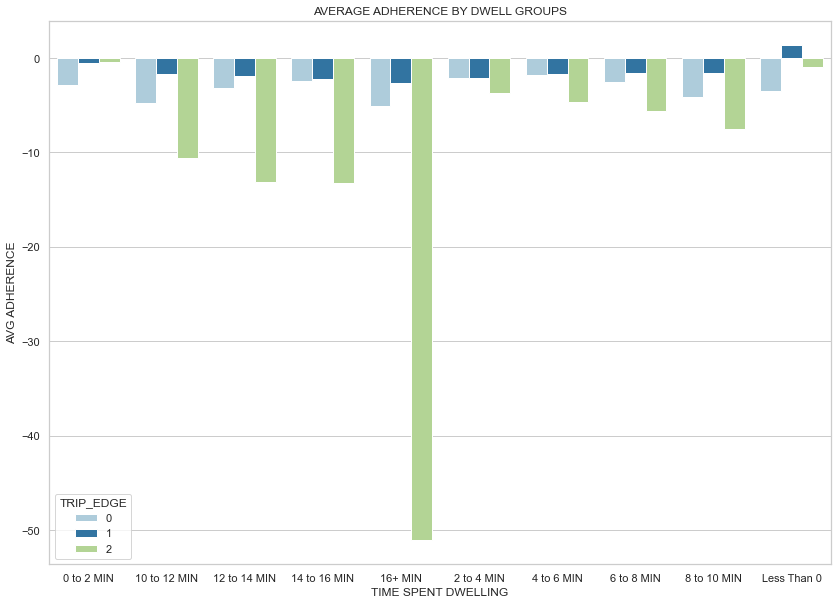

In [28]:
def calculate_adherence(df_dwell):
    return df_dwell.ADHERENCE.mean()
layover_dwell = df_dwell.groupby(['DWELL_GROUPS', 'TRIP_EDGE']).apply(calculate_adherence)
layover_dwell = layover_dwell.reset_index()
plt.figure(figsize=(14,10))
sns.barplot(x='DWELL_GROUPS', y=0, hue='TRIP_EDGE', palette='Paired', data=layover_dwell)
plt.ylabel('AVG ADHERENCE')

plt.xlabel('TIME SPENT DWELLING')
plt.title('AVERAGE ADHERENCE BY DWELL GROUPS');

In [29]:
layover_dwell

,DWELL_GROUPS,TRIP_EDGE,0
0,0 to 2 MIN,0,-2.890970
1,0 to 2 MIN,1,-0.532331
2,0 to 2 MIN,2,-0.436973
3,10 to 12 MIN,0,-4.809634
4,10 to 12 MIN,1,-1.660531
5,10 to 12 MIN,2,-10.615476
6,12 to 14 MIN,0,-3.168645
7,12 to 14 MIN,1,-1.886636
8,12 to 14 MIN,2,-13.181089
9,14 to 16 MIN,0,-2.396282


In [30]:
# TIME_OF_DAY = []

# for x in layover['SCHEDULED_TIME']:
#     if x >= '00:00:00' and x <= '01:00:00':
#         TIME_OF_DAY.append('MIDNIGHT to 1AM')
#     elif x > '01:00:00' and x <= '02:00:00':
#         TIME_OF_DAY.append('1 to 2AM')
#     elif x > '02:00:00' and x <= '03:00:00':
#         TIME_OF_DAY.append('2 to 3AM')
#     elif x > '03:00:00' and x <= '04:00:00':
#         TIME_OF_DAY.append('3 to 4AM')
#     elif x > '04:00:00' and x <= '05:00:00':
#         TIME_OF_DAY.append('4 to 5AM')
#     elif x > '05:00:00' and x <= '06:00:00':
#         TIME_OF_DAY.append('5 to 6AM')
#     elif x > '06:00:00' and x <= '07:00:00':
#         TIME_OF_DAY.append('6 to 7AM')
#     elif x > '07:00:00' and x <= '08:00:00':
#         TIME_OF_DAY.append('7 to 8AM')
#     elif x > '08:00:00' and x <= '09:00:00':
#         TIME_OF_DAY.append('8 to 9AM')
#     elif x > '09:00:00' and x <= '10:00:00':
#         TIME_OF_DAY.append('9 to 10AM')
#     elif x > '10:00:00' and x <= '11:00:00':
#         TIME_OF_DAY.append('10 to 11AM')
#     elif x > '11:00:00' and x <= '12:00:00':
#         TIME_OF_DAY.append('11 to NOON')
#     elif x > '12:00:00' and x <= '13:00:00':
#         TIME_OF_DAY.append('NOON to 1PM')
#     elif x > '13:00:00' and x <= '14:00:00':
#         TIME_OF_DAY.append('1 to 2PM')
#     elif x > '14:00:00' and x <= '15:00:00':
#         TIME_OF_DAY.append('2 to 3PM')
#     elif x > '15:00:00' and x <= '16:00:00':
#         TIME_OF_DAY.append('3 to 4PM')
#     elif x > '16:00:00' and x <= '17:00:00':
#         TIME_OF_DAY.append('4 to 5PM')
#     elif x > '17:00:00' and x <= '18:00:00':
#         TIME_OF_DAY.append('5 to 6PM')
#     elif x > '18:00:00' and x <= '19:00:00':
#         TIME_OF_DAY.append('6 to 7PM')
#     elif x > '19:00:00' and x <= '20:00:00':
#         TIME_OF_DAY.append('7 to 8PM')
#     elif x > '20:00:00' and x <= '21:00:00':
#         TIME_OF_DAY.append('8 to 9PM')
#     elif x > '21:00:00' and x <= '22:00:00':
#         TIME_OF_DAY.append('9 to 10PM')
#     elif x > '22:00:00' and x <= '23:00:00':
#         TIME_OF_DAY.append('10 to 11PM')
#     elif x > '23:00:00' and x <= '24:00:00':
#         TIME_OF_DAY.append('11PM to MIDNIGHT')
#     else:
#         TIME_OF_DAY.append('TWILIGHT ZONE')
# TIME_OF_DAY

In [31]:
# TIME_OF_DAY = pd.DataFrame(TIME_OF_DAY)
# TIME_OF_DAY.columns = ['TIME_OF_DAY']

In [32]:
# layover1 = pd.concat([layover, TIME_OF_DAY], axis='columns')
# layover1

In [33]:
layover['DATE'] =  pd.to_datetime(layover['DATE'])
layover['WEEKDAY'] = [calendar.day_name[x.weekday()] for x in layover['DATE']]
layover.head()

/var/folders/46/zm0dtt4s22d760_6ml4_t_vr0000gn/T/ipykernel_3775/2891912651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layover['DATE'] =  pd.to_datetime(layover['DATE'])
/var/folders/46/zm0dtt4s22d760_6ml4_t_vr0000gn/T/ipykernel_3775/2891912651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layover['WEEKDAY'] = [calendar.day_name[x.weekday()] for x in layover['DATE']]


,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,DWELL_IN_MINS,HDWY_DEV_PCT,WEEKDAY
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,12.650000,0.141667,Monday
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,0.000000,0.238095,Monday
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,5.766666,NaN,Monday
5,120211101,1,76447969,2021-11-01,22,2200,1352,298143,0,TO DOWNTOWN,...,04:42:00,04:29:30,04:41:50,0.166666,NaN,NaN,NaN,12.333333,NaN,Monday
6,120211101,1,76447970,2021-11-01,22,2200,1352,298143,0,TO DOWNTOWN,...,04:46:00,04:46:58,04:46:58,-0.966666,NaN,NaN,NaN,0.000000,NaN,Monday


In [34]:
layover.groupby(['WEEKDAY', 'TRIP_EDGE']).agg({'DWELL_IN_MINS':['mean'], 'HDWY_DEV':['mean']})

DWELL_IN_MINS  HDWY_DEV
                             mean      mean
WEEKDAY   TRIP_EDGE                        
Friday    0              0.538458  0.319032
          1             12.039427  0.510459
Monday    0              0.613198  0.199423
          1             13.039623  0.362445
Saturday  0              0.602772  0.583795
          1             12.928332  0.687694
Sunday    0              0.705202  0.480534
          1             14.264729  0.517770
Thursday  0              0.569063  0.356416
          1             12.344307  0.565676
Tuesday   0              0.582535  0.169731
          1             12.614906  0.378338
Wednesday 0              0.568189  0.316803
          1             12.520990  0.567268

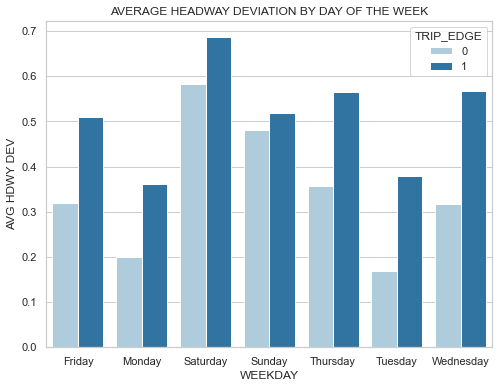

In [35]:
def calculate_days(layover):
    return layover.HDWY_DEV.mean()
layover_plot_week = layover.groupby(['WEEKDAY', 'TRIP_EDGE']).apply(calculate_days)
layover_plot_week = layover_plot_week.reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='WEEKDAY', y=0, hue='TRIP_EDGE', palette='Paired', data=layover_plot_week)
plt.ylabel('AVG HDWY DEV')
plt.xlabel('WEEKDAY')
plt.title('AVERAGE HEADWAY DEVIATION BY DAY OF THE WEEK');

In [36]:
layover_plot_week

,WEEKDAY,TRIP_EDGE,0
0,Friday,0,0.319032
1,Friday,1,0.510459
2,Monday,0,0.199423
3,Monday,1,0.362445
4,Saturday,0,0.583795
5,Saturday,1,0.687694
6,Sunday,0,0.480534
7,Sunday,1,0.517770
8,Thursday,0,0.356416
9,Thursday,1,0.565676


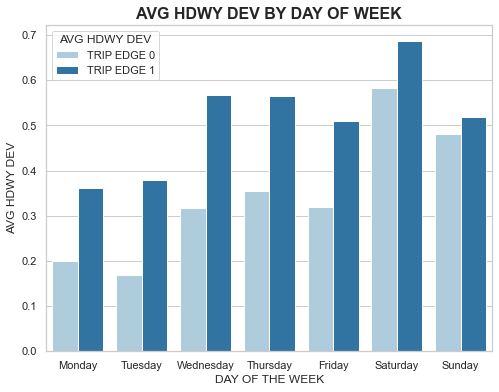

In [56]:
trip0 = pd.DataFrame({'x':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                     'y':[0.199423, 0.169731, 0.316803, 0.3546416, 0.319032, 0.583795, 0.480534]})
trip1 = pd.DataFrame({'x':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                     'y':[0.362445, 0.378338, 0.567268, 0.565676, 0.510459, 0.687694, 0.517770]})
trip0['AVG HDWY DEV'] = 'TRIP EDGE 0'
trip1['AVG HDWY DEV'] = 'TRIP EDGE 1'
res = pd.concat([trip0, trip1])
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='x', y='y', data = res, hue = 'AVG HDWY DEV', ax = ax)
plt.xlabel('DAY OF THE WEEK')
plt.ylabel('AVG HDWY DEV')
plt.title('AVG HDWY DEV BY DAY OF WEEK', fontweight = 'bold', size = 16);

In [69]:
wego_tidy['DATE'] =  pd.to_datetime(wego_tidy['DATE'])
wego_tidy['WEEKDAY'] = [calendar.day_name[x.weekday()] for x in wego_tidy['DATE']]
wego_tidy.head()

/var/folders/46/zm0dtt4s22d760_6ml4_t_vr0000gn/T/ipykernel_3775/1018408640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wego_tidy['DATE'] =  pd.to_datetime(wego_tidy['DATE'])
/var/folders/46/zm0dtt4s22d760_6ml4_t_vr0000gn/T/ipykernel_3775/1018408640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wego_tidy['WEEKDAY'] = [calendar.day_name[x.weekday()] for x in wego_tidy['DATE']]


,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,DWELL_IN_MINS,HDWY_DEV_PCT,WEEKDAY
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,12.650000,0.141667,Monday
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,0.000000,0.238095,Monday
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,22.416666,NaN,Monday
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,5.766666,NaN,Monday
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,0.000000,NaN,Monday


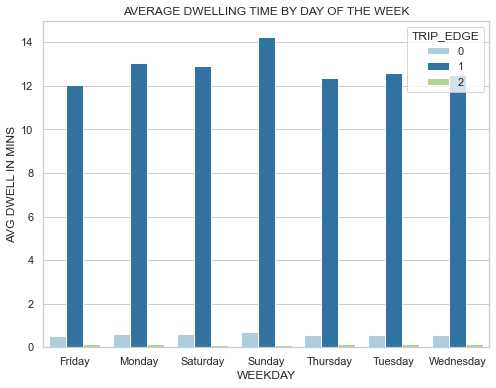

In [71]:
def calculate_dwell_days(wego_tidy):
    return wego_tidy.DWELL_IN_MINS.mean()
layover_plot_dwell_days = wego_tidy.groupby(['WEEKDAY', 'TRIP_EDGE']).apply(calculate_dwell_days)
layover_plot_dwell_days = layover_plot_dwell_days.reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='WEEKDAY', y=0, hue='TRIP_EDGE', palette='Paired', data=layover_plot_dwell_days)
plt.ylabel('AVG DWELL IN MINS')
plt.xlabel('WEEKDAY')
plt.title('AVERAGE DWELLING TIME BY DAY OF THE WEEK');

In [72]:
layover_plot_dwell_days

,WEEKDAY,TRIP_EDGE,0
0,Friday,0,0.538458
1,Friday,1,12.039427
2,Friday,2,0.147922
3,Monday,0,0.613198
4,Monday,1,13.039623
5,Monday,2,0.156845
6,Saturday,0,0.602772
7,Saturday,1,12.928332
8,Saturday,2,0.113638
9,Sunday,0,0.705202


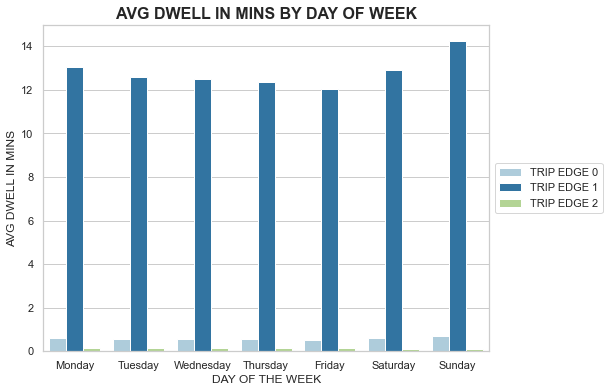

In [77]:
trip0_dwell = pd.DataFrame({'x':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                     'y':[0.613198, 0.582535, 0.568189, 0.569063, 0.538458, 0.602772, 0.705202]})
trip1_dwell = pd.DataFrame({'x':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                     'y':[13.039623, 12.614906, 12.520990, 12.344307, 12.039427, 12.928332, 14.264729]})
trip2_dwell = pd.DataFrame({'x':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                     'y':[0.156845, 0.153636, 0.158577, 0.162390, 0.147922, 0.113638, 0.108355]})

trip0_dwell['AVG DWELL IN MINS'] = 'TRIP EDGE 0'
trip1_dwell['AVG DWELL IN MINS'] = 'TRIP EDGE 1'
trip2_dwell['AVG DWELL IN MINS'] = 'TRIP EDGE 2'
res2 = pd.concat([trip0_dwell, trip1_dwell, trip2_dwell])
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='x', y='y', data = res2, hue = 'AVG DWELL IN MINS', ax = ax)
plt.xlabel('DAY OF THE WEEK')
plt.ylabel('AVG DWELL IN MINS')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('AVG DWELL IN MINS BY DAY OF WEEK', fontweight = 'bold', size = 16);

In [42]:
wego_locations = wego.groupby(['ROUTE_ABBR','ROUTE_STOP_SEQUENCE'])['LATITUDE', 'LONGITUDE'].value_counts()
wego_locations

/var/folders/46/zm0dtt4s22d760_6ml4_t_vr0000gn/T/ipykernel_3775/1354125157.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  wego_locations = wego.groupby(['ROUTE_ABBR','ROUTE_STOP_SEQUENCE'])['LATITUDE', 'LONGITUDE'].value_counts()


ROUTE_ABBR  ROUTE_STOP_SEQUENCE  LATITUDE   LONGITUDE 
3           1.0                  36.167091  -86.781923      213
            2.0                  36.167091  -86.781923    40229
            3.0                  36.148685  -86.804611    20397
                                 36.149007  -86.804449    20046
            4.0                  36.143233  -86.814581    20395
                                                          ...  
56          11.0                 36.300470  -86.695610    17300
                                 36.307973  -86.685963    12188
            12.0                 36.307973  -86.685963    17326
                                 36.300470  -86.695610    12188
            13.0                 36.300470  -86.695610    17319
Length: 181, dtype: int64